In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
audio_files = pd.read_csv("/home/ayan-sinha/Desktop/CVRamanLab/Data/processed/annotations_10_sec_all_labels.csv")

In [3]:
audio_files

,Unnamed: 0,path,instrument,emotion
0,0,10_sec_chunks/anxiety_flute0.wav,flute,anxiety
1,1,10_sec_chunks/anxiety_flute1.wav,flute,anxiety
2,2,10_sec_chunks/anxiety_flute2.wav,flute,anxiety
3,3,10_sec_chunks/anxiety_flute3.wav,flute,anxiety
4,4,10_sec_chunks/anxiety_flute4.wav,flute,anxiety
...,...,...,...,...
5609,5609,10_sec_chunks/sad_sarod6007.wav,sarod,sad
5610,5610,10_sec_chunks/sad_sarod6008.wav,sarod,sad
5611,5611,10_sec_chunks/sad_sarod6009.wav,sarod,sad
5612,5612,10_sec_chunks/sad_sarod6010.wav,sarod,sad


In [4]:
audio_files.drop(['Unnamed: 0'], axis=1, inplace=True)
audio_files

,path,instrument,emotion
0,10_sec_chunks/anxiety_flute0.wav,flute,anxiety
1,10_sec_chunks/anxiety_flute1.wav,flute,anxiety
2,10_sec_chunks/anxiety_flute2.wav,flute,anxiety
3,10_sec_chunks/anxiety_flute3.wav,flute,anxiety
4,10_sec_chunks/anxiety_flute4.wav,flute,anxiety
...,...,...,...
5609,10_sec_chunks/sad_sarod6007.wav,sarod,sad
5610,10_sec_chunks/sad_sarod6008.wav,sarod,sad
5611,10_sec_chunks/sad_sarod6009.wav,sarod,sad
5612,10_sec_chunks/sad_sarod6010.wav,sarod,sad


In [5]:
audio_files['path']='/home/ayan-sinha/Desktop/CVRamanLab/Data/medha_output/' + audio_files['path'].astype(str)
#audio_files=audio_files.rename(columns={"slice_file_name":"path","classID":"instrument"})

In [6]:
audio_files

,path,instrument,emotion
0,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
1,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
2,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
3,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
4,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
...,...,...,...
5609,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,sarod,sad
5610,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,sarod,sad
5611,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,sarod,sad
5612,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,sarod,sad


In [7]:
audio_files.emotion.value_counts()

anxiety    1565
calm       1526
sad        1272
happy      1251
Name: emotion, dtype: int64

In [8]:
audio_files.instrument.value_counts()

flute    2076
sarod    2062
sitar    1476
Name: instrument, dtype: int64

In [9]:
# Importing 1 file
sample_file = audio_files["path"][0]
print(sample_file)
y, sr = librosa.load(sample_file)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

/home/ayan-sinha/Desktop/CVRamanLab/Data/medha_output/10_sec_chunks/anxiety_flute0.wav
y: [ 0.01035014  0.02343081 -0.00232193 ... -0.02404302 -0.02592458
 -0.01758829] 

y shape: (220500,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [10]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.01035014  0.02343081 -0.00232193 ... -0.02404302 -0.02592458
 -0.01758829] 

Audio File shape: (220500,)


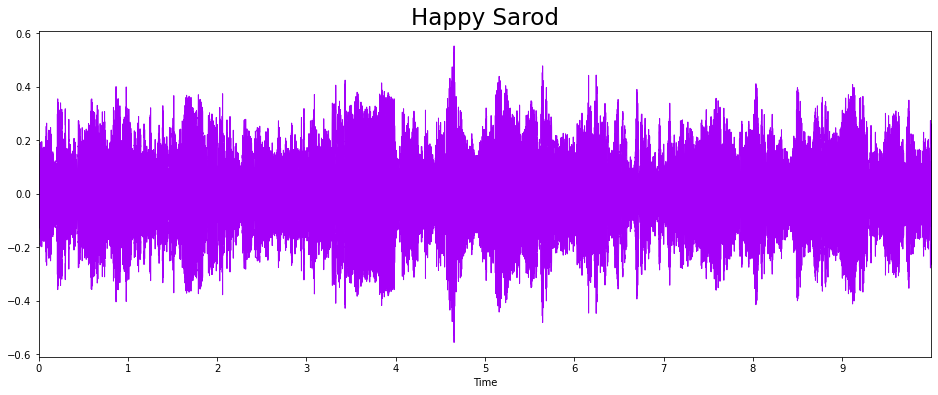

In [11]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Happy Sarod", fontsize = 23);

In [12]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))
print('Mean:', D.mean(), '\n')
print('Var:', D.var())

print('Shape of D object:', np.shape(D))

Mean: 0.5658384 

Var: 11.995381
Shape of D object: (1025, 431)


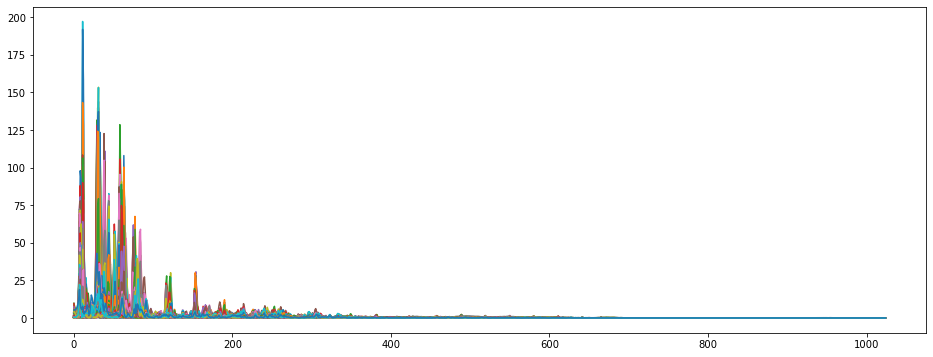

In [13]:
plt.figure(figsize = (16, 6))
plt.plot(D);

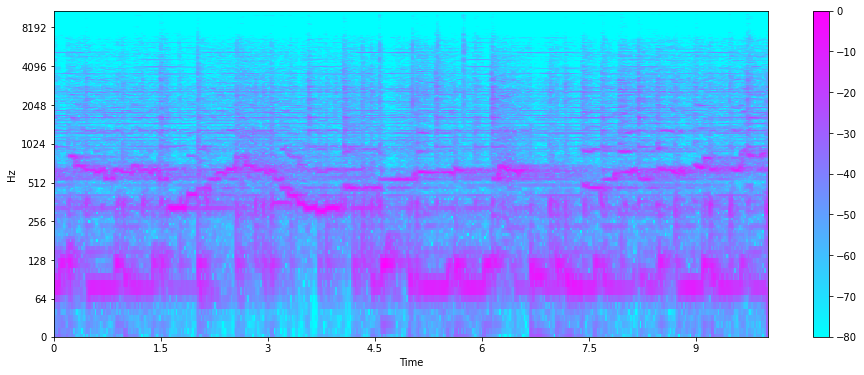

In [14]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

Shape (128, 431)
Mean: -76.04307 

Var: 117.5731


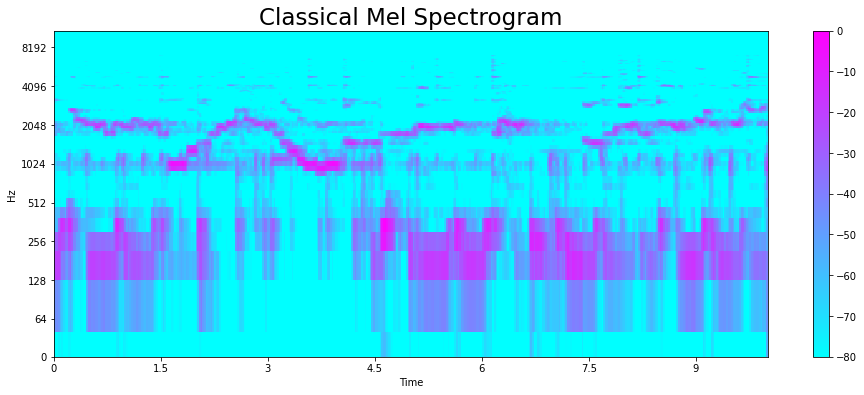

In [15]:
y, sr = librosa.load(sample_file)
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
print('Shape', S_DB.shape)
print('Mean:', S_DB.mean(), '\n')
print('Var:', S_DB.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

In [16]:
y, sr = librosa.load(sample_file)
y, _ = librosa.effects.trim(y)

S, phase = librosa.magphase(librosa.stft(y))
rms_audio = librosa.feature.rms(S=S)
print(rms_audio.shape)
print('Mean:', rms_audio.mean(), '\n')
print('Var:', rms_audio.var())

(1, 431)
Mean: 0.07370445532607514 

Var: 0.0005862783697233153


In [17]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

10333


Harmonics: [0.02888098 0.02564619 0.01643706 ... 0.         0.         0.        ] 

Perceptrual: [0.02888098 0.02564619 0.01643706 ... 0.         0.         0.        ] 

Mean: -1.1279137e-05 

Var: 0.013111435
Mean: -0.00012286718 

Var: 0.00085983943


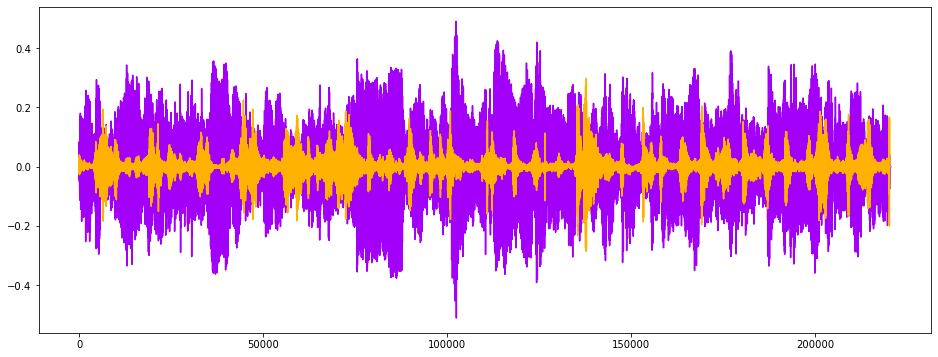

In [18]:
y_harm, y_perc = librosa.effects.hpss(audio_file)
print('Harmonics:', y_harm, '\n')
print('Perceptrual:', y_harm, '\n')

print('Mean:', y_harm.mean(), '\n')
print('Var:', y_harm.var())


print('Mean:', y_perc.mean(), '\n')
print('Var:', y_perc.var())


plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

In [19]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

117.45383522727273

In [20]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
#print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')
print('Mean:', spectral_centroids.mean(), '\n')
print('Var:', spectral_centroids.var())

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

#print('frames:', frames, '\n')
#print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Shape of Spectral Centroids: (431,) 

Mean: 1061.1625776270087 

Var: 76680.38287609952


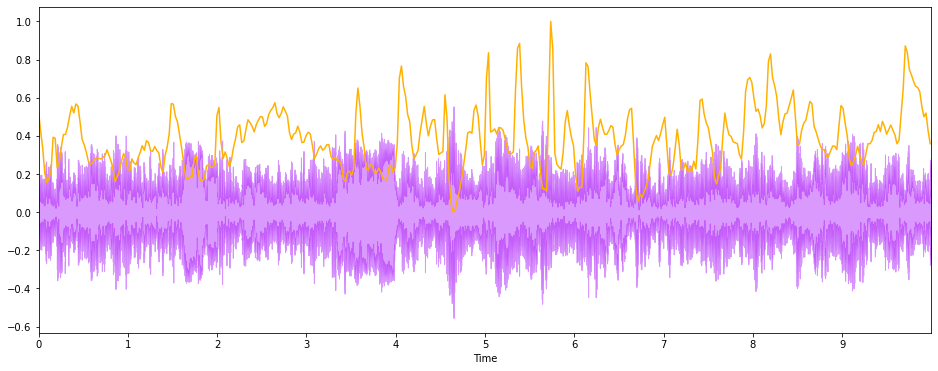

In [21]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

Shape (431,) 

Mean: 1337.6186817853836 

Var: 41646.82001817004


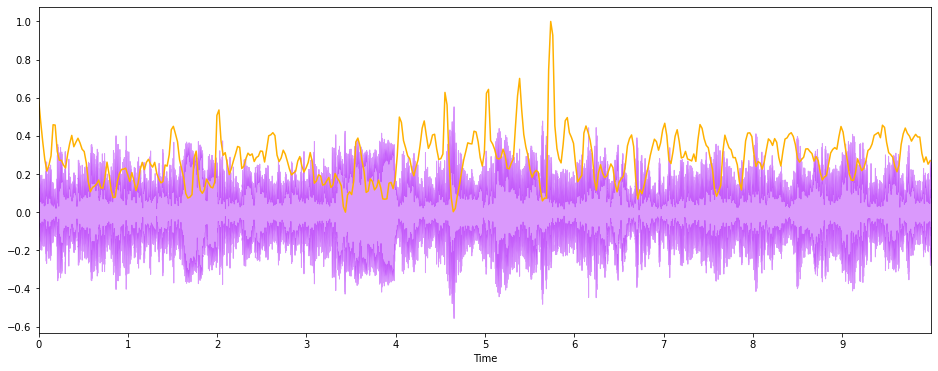

In [22]:
# Calculate the Spectral Bandwidths
spectral_bandwidths = librosa.feature.spectral_bandwidth(audio_file, sr=sr)[0]

print('Shape', spectral_bandwidths.shape, '\n')
print('Mean:', spectral_bandwidths.mean(), '\n')
print('Var:', spectral_bandwidths.var())

plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_bandwidths), color='#FFB100');

Shape (431,) 

Mean: 22.009893148805943 

Var: 20.845376026362477


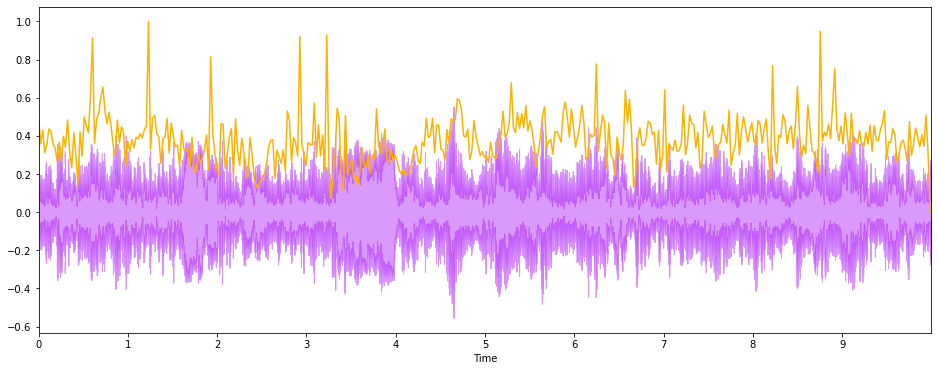

In [23]:
# Calculate the Spectral Contrast
spectral_contrasts = librosa.feature.spectral_contrast(audio_file, sr=sr)[0]

print('Shape', spectral_contrasts.shape, '\n')
print('Mean:', spectral_contrasts.mean(), '\n')
print('Var:', spectral_contrasts.var())

plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_contrasts), color='#FFB100');

In [24]:
flatness = librosa.feature.spectral_flatness(audio_file)

print('Shape', flatness.shape, '\n')
print('Mean:', flatness.mean(), '\n')
print('Var:', flatness.var())

Shape (1, 431) 

Mean: 0.0004088284 

Var: 4.505015e-07


(431,)
Mean: 2066.8627533171402 

Var: 472006.39251322433


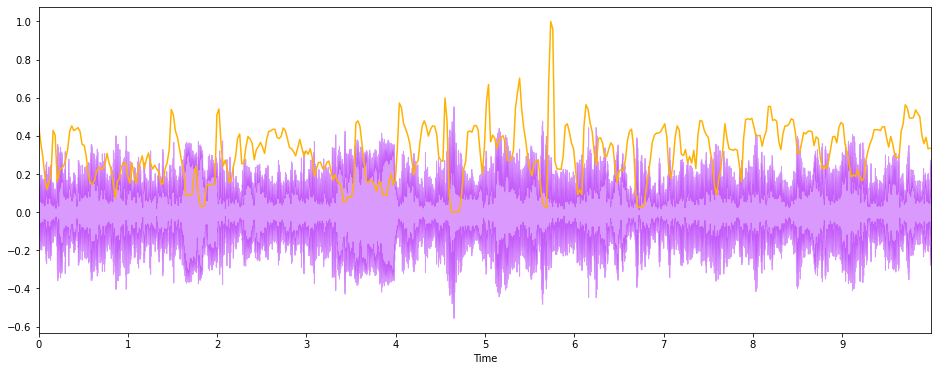

In [25]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]
print(spectral_rolloff.shape)
print('Mean:', spectral_rolloff.mean(), '\n')
print('Var:', spectral_rolloff.var())

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

mfccs shape: (20, 431)


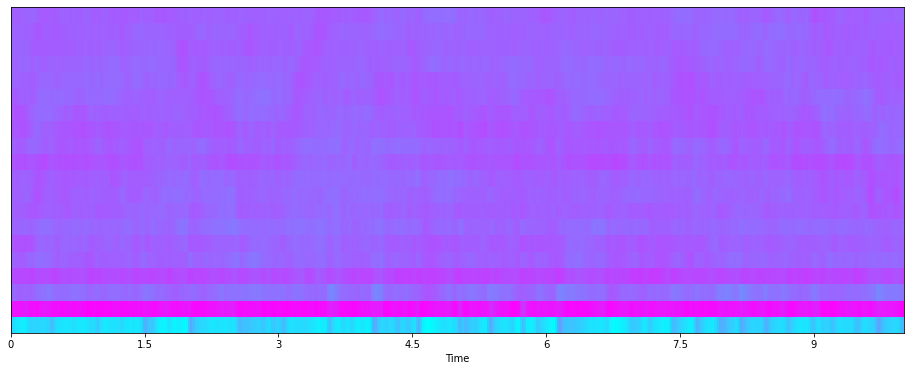

In [26]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

(20, 431)
Mean: 3.5403223e-09 

Var: 1.0


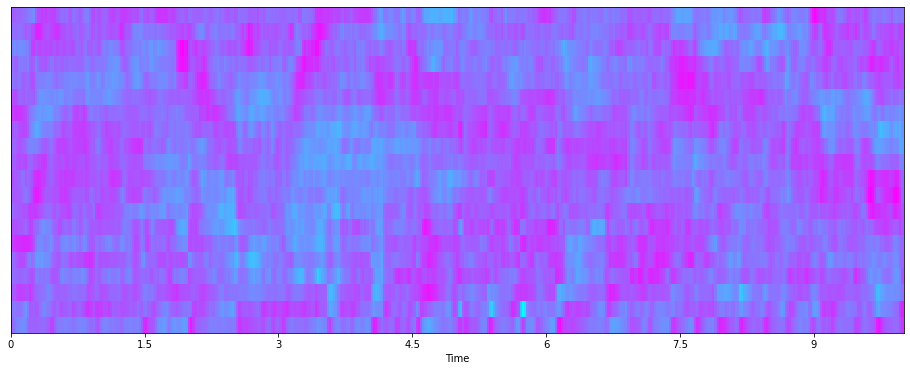

In [27]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.shape)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chromogram shape: (12, 45)
Mean: 0.25822443 

Var: 0.0987448


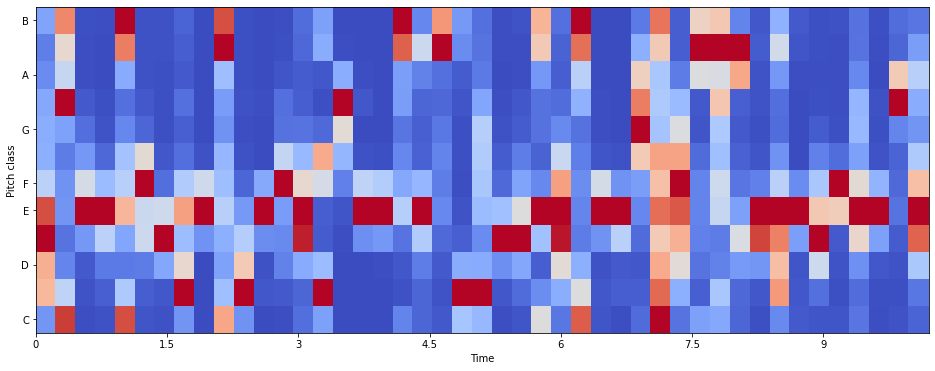

In [28]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)
print('Mean:', chromagram.mean(), '\n')
print('Var:', chromagram.var())


plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

Chromogram shape: (12, 44)
Mean: 0.3552883 

Var: 0.07322432


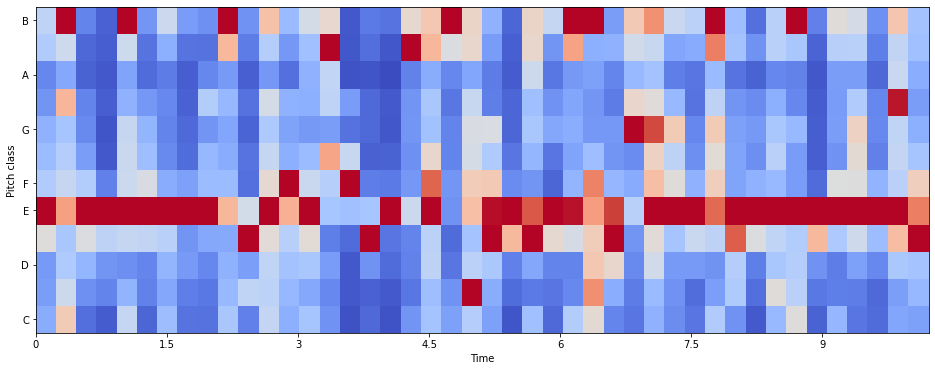

In [29]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length_cqt = 5120

# Chromogram
chromogram_cqt = librosa.feature.chroma_cqt(audio_file, sr=sr, hop_length=hop_length_cqt)
print('Chromogram shape:', chromogram_cqt.shape)
print('Mean:', chromogram_cqt.mean(), '\n')
print('Var:', chromogram_cqt.var())


plt.figure(figsize=(16, 6))
librosa.display.specshow(chromogram_cqt, x_axis='time', y_axis='chroma', hop_length=hop_length_cqt, cmap='coolwarm');

Chromogram shape: (12, 44)
Mean: 0.24544595316121634 

Var: 0.023089617410115327


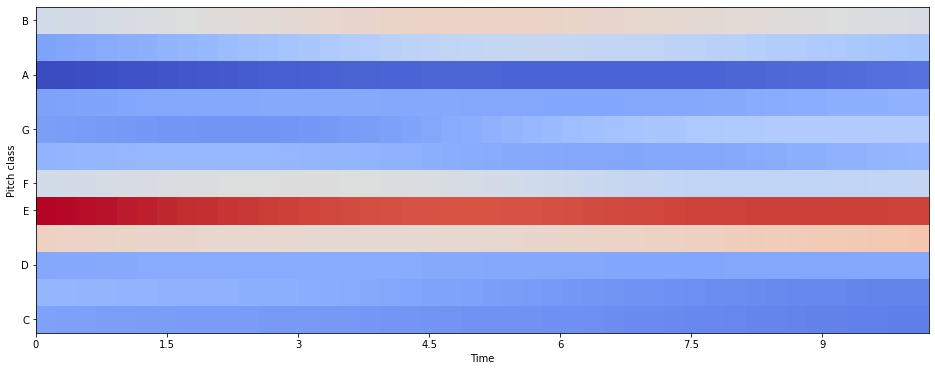

In [30]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram_cens = librosa.feature.chroma_cens(audio_file, sr=sr, hop_length=hop_length_cqt)
print('Chromogram shape:', chromagram_cens.shape)
print('Mean:', chromagram_cens.mean(), '\n')
print('Var:', chromagram_cens.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram_cens, x_axis='time', y_axis='chroma', hop_length=hop_length_cqt, cmap='coolwarm');

In [31]:
audio_file = librosa.effects.harmonic(audio_file)
tonnetz = librosa.feature.tonnetz(y=audio_file, sr=sr)

print('shape:', tonnetz.shape)
print('Mean:', tonnetz.mean(), '\n')
print('Var:', tonnetz.var())

shape: (6, 431)
Mean: 0.04120894913935085 

Var: 0.022649568283199216


In [32]:
audio_stft = np.abs(librosa.stft(y))

p0 = librosa.feature.poly_features(S=audio_stft, order=0)
p1 = librosa.feature.poly_features(S=audio_stft, order=1)
p2 = librosa.feature.poly_features(S=audio_stft, order=2)

print('shape:', p0.shape)
print('Mean:', p0.mean(), '\n')
print('Var:', p0.var())

shape: (1, 431)
Mean: 0.5658383047576467 

Var: 0.020210716033135814


In [33]:
hop_length_tempo = 512

oenv = librosa.onset.onset_strength(y=audio_file, sr=sr, hop_length=hop_length_tempo)

tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

print('shape:', tempogram.shape)
print('Mean:', tempogram.mean(), '\n')
print('Var:', tempogram.var())

shape: (384, 431)
Mean: 0.26350291219977484 

Var: 0.09681775065454684


In [34]:
audio_files_sample = audio_files.iloc[1:5,:].copy()
audio_files_sample

,path,instrument,emotion
1,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
2,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
3,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety
4,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety


In [35]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [36]:
feature_series_all = []

for index, row in audio_files.iterrows():
    audio_path = row["path"]
    audio_instrument = row["instrument"]
    audio_emotion = row["emotion"]
    print(audio_path)
    #print(audio_instrument)
    #print(audio_emotion)
    
    audio_file, sr = librosa.load(audio_path)
    audio_file, _ = librosa.effects.trim(audio_file)
    
    zero_crossings = librosa.zero_crossings(audio_file, pad=False)
    
    # Feature `f_zero_crossings_sum`
    f_zero_crossings_sum = sum(zero_crossings)
    
    # Feature `f_tempo`
    f_tempo, _ = librosa.beat.beat_track(audio_file, sr = sr)
    
    S = librosa.feature.melspectrogram(audio_file, sr=sr)
    mel_spec = librosa.amplitude_to_db(S, ref=np.max)
    
    # Feature `f_melspec_mean` and `f_melspec_var`
    f_melspec_mean = mel_spec.mean()
    f_melspec_var = mel_spec.var()
    
    S, phase = librosa.magphase(librosa.stft(audio_file))
    rms_audio = librosa.feature.rms(S=S)
    
    #Feature `f_rms_mean` and `f_rms_var`
    f_rms_mean = rms_audio.mean()
    f_rms_var = rms_audio.var()
    
    mfccs_3 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=3)
    mfccs_3 = sklearn.preprocessing.scale(mfccs_3, axis=1)
    
    mfccs_5 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=5)
    mfccs_5 = sklearn.preprocessing.scale(mfccs_5, axis=1)
    
    mfccs_8 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=8)
    mfccs_8 = sklearn.preprocessing.scale(mfccs_8, axis=1)
    
    mfccs_10 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=10)
    mfccs_10 = sklearn.preprocessing.scale(mfccs_10, axis=1)
    
    mfccs_11 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=11)
    mfccs_11 = sklearn.preprocessing.scale(mfccs_11, axis=1)
    
    mfccs_12 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=12)
    mfccs_12 = sklearn.preprocessing.scale(mfccs_12, axis=1)
    
    mfccs_13 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=13)
    mfccs_13 = sklearn.preprocessing.scale(mfccs_13, axis=1)
    
    mfccs_14 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=14)
    mfccs_14 = sklearn.preprocessing.scale(mfccs_14, axis=1)
    
    mfccs_15 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=15)
    mfccs_15 = sklearn.preprocessing.scale(mfccs_15, axis=1)
    
    mfccs_16 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=16)
    mfccs_16 = sklearn.preprocessing.scale(mfccs_16, axis=1)
    
    mfccs_17 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=17)
    mfccs_17 = sklearn.preprocessing.scale(mfccs_17, axis=1)
    
    mfccs_18 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=18)
    mfccs_18 = sklearn.preprocessing.scale(mfccs_18, axis=1)
    
    mfccs_19 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=19)
    mfccs_19 = sklearn.preprocessing.scale(mfccs_19, axis=1)
    
    mfccs_20 = librosa.feature.mfcc(audio_file, sr=sr, n_mfcc=20)
    mfccs_20 = sklearn.preprocessing.scale(mfccs_20, axis=1)
    
    # Features: `f_mfcc_n_mean` and `f_mfcc_n_var` for n = [3, 5, 8, 10:20]
    f_mfcc_3_mean = mfccs_3.mean()
    f_mfcc_3_var = mfccs_3.var()
    
    f_mfcc_5_mean = mfccs_5.mean()
    f_mfcc_5_var = mfccs_5.var()
    
    f_mfcc_8_mean = mfccs_8.mean()
    f_mfcc_8_var = mfccs_8.var()
    
    f_mfcc_10_mean = mfccs_10.mean()
    f_mfcc_10_var = mfccs_10.var()
    
    f_mfcc_11_mean = mfccs_11.mean()
    f_mfcc_11_var = mfccs_11.var()
    
    f_mfcc_12_mean = mfccs_12.mean()
    f_mfcc_12_var = mfccs_12.var()
    
    f_mfcc_13_mean = mfccs_13.mean()
    f_mfcc_13_var = mfccs_13.var()
    
    f_mfcc_14_mean = mfccs_14.mean()
    f_mfcc_14_var = mfccs_14.var()
    
    f_mfcc_15_mean = mfccs_15.mean()
    f_mfcc_15_var = mfccs_15.var()
    
    f_mfcc_16_mean = mfccs_16.mean()
    f_mfcc_16_var = mfccs_16.var()
    
    f_mfcc_17_mean = mfccs_17.mean()
    f_mfcc_17_var = mfccs_17.var()
    
    f_mfcc_18_mean = mfccs_18.mean()
    f_mfcc_18_var = mfccs_18.var()
    
    f_mfcc_19_mean = mfccs_19.mean()
    f_mfcc_19_var = mfccs_19.var()
    
    f_mfcc_20_mean = mfccs_20.mean()
    f_mfcc_20_var = mfccs_20.var()
    
    hop_length = 5000
    hop_length_cqt = 5120
    
    chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
    
    # Features `f_chroma_stft_mean` and `f_chroma_stft_var`
    f_chroma_stft_mean = chromagram.mean()
    f_chroma_stft_var = chromagram.var()
    
    chromogram_cqt = librosa.feature.chroma_cqt(audio_file, sr=sr, hop_length=hop_length_cqt)
    
    # Features `f_chroma_cqt_mean` and `f_chroma_cqt_var`
    f_chroma_cqt_mean = chromogram_cqt.mean()
    f_chroma_cqt_var = chromogram_cqt.var()
    
    chromagram_cens = librosa.feature.chroma_cens(audio_file, sr=sr, hop_length=hop_length_cqt)
    
    # Features `f_chroma_cens_mean` and `f_chroma_cens_var`
    f_chroma_cens_mean = chromagram_cens.mean()
    f_chroma_cens_var = chromagram_cens.var()
    
    spectral_centroids = normalize(librosa.feature.spectral_centroid(audio_file, sr=sr)[0])
    
    # Features `f_spec_centr_mean` and `f_spec_centr_var`
    f_spec_centr_mean = spectral_centroids.mean()
    f_spec_centr_var = spectral_centroids.var()
    
    spectral_bandwidths = librosa.feature.spectral_bandwidth(audio_file, sr=sr)[0]
    
    # Features `f_spec_bandw_mean` and `f_spec_bandw_var`
    f_spec_bandw_mean = spectral_bandwidths.mean()
    f_spec_bandw_var = spectral_bandwidths.var()
    
    spectral_contrasts = librosa.feature.spectral_contrast(audio_file, sr=sr)[0]
    
    # Features `f_spec_contr_mean` and `f_spec_contr_var`
    f_spec_contr_mean = spectral_contrasts.mean()
    f_spec_contr_var = spectral_contrasts.var()
    
    flatness = librosa.feature.spectral_flatness(audio_file)
    
    # Features `f_spec_flat_mean` and `f_spec_flat_var`
    f_spec_flat_mean = flatness.mean()
    f_spec_flat_var = flatness.var()
    
    spectral_rolloff = normalize(librosa.feature.spectral_rolloff(audio_file, sr=sr)[0])
    
    # Features `f_spec_roll_mean` and `f_spec_roll_var`
    f_spec_roll_mean = spectral_rolloff.mean()
    f_spec_roll_var = spectral_rolloff.var()
    
    audio_file_h = librosa.effects.harmonic(audio_file)
    tonnetz = librosa.feature.tonnetz(y=audio_file_h, sr=sr)
    
    # Features `f_spec_roll_mean` and `f_spec_roll_var`
    f_tonnetz_mean = tonnetz.mean()
    f_tonnetz_var = tonnetz.var()
    
    audio_stft = np.abs(librosa.stft(audio_file))

    p0 = librosa.feature.poly_features(S=audio_stft, order=0)
    p1 = librosa.feature.poly_features(S=audio_stft, order=1)
    p2 = librosa.feature.poly_features(S=audio_stft, order=2)
    
    # Features `f_poly_n_mean` and `f_poly_n_var` for n = [0, 1, 2]
    f_poly_0_mean = p0.mean()
    f_poly_0_var = p0.var()
    
    f_poly_1_mean = p1.mean()
    f_poly_1_var = p1.var()
    
    f_poly_2_mean = p2.mean()
    f_poly_2_var = p2.var()
    
    hop_length_tempo = 512
    oenv = librosa.onset.onset_strength(y=audio_file, sr=sr, hop_length=hop_length_tempo)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
    
    fourier_tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr,hop_length=hop_length)

    # Features `f_tempogram_mean` and `f_tempogram_var`
    f_tempogram_mean = tempogram.mean()
    f_tempogram_var = tempogram.var()
    
    # Features `f_fourier_tempogram_mean` and `f_fourier_tempogram_var`
    f_fourier_tempogram_mean_real = fourier_tempogram.mean().real
    f_fourier_tempogram_mean_imag = fourier_tempogram.mean().imag
    f_fourier_tempogram_var = fourier_tempogram.var()

    y_harm, y_perc = librosa.effects.hpss(audio_file)

    f_harm_mean = y_harm.mean()
    f_harm_var = y_harm.var()

    f_perc_mean = y_perc.mean()
    f_perc_var = y_perc.var()

    feature_series = pd.Series({
        "path": audio_path,
        "instrument": audio_instrument,
        "emotion": audio_emotion,
        "f_zero_crossings_sum": f_zero_crossings_sum,
        "f_tempo": f_tempo,
        "f_chroma_stft_mean": f_chroma_stft_mean,
        "f_chroma_stft_var": f_chroma_stft_var,
        "f_chroma_cqt_mean": f_chroma_cqt_mean,
        "f_chroma_cqt_var": f_chroma_cqt_var,
        "f_chroma_cens_mean": f_chroma_cens_mean,
        "f_chroma_cens_var": f_chroma_cens_var,
        "f_melspec_mean": f_melspec_mean,
        "f_melspec_var": f_melspec_var,
        "f_mfcc_3_mean": f_mfcc_3_mean,
        "f_mfcc_3_var": f_mfcc_3_var,
        "f_mfcc_5_mean": f_mfcc_5_mean,
        "f_mfcc_5_var": f_mfcc_5_var,
        "f_mfcc_8_mean": f_mfcc_8_mean,
        "f_mfcc_8_var": f_mfcc_8_var,
        "f_mfcc_10_mean": f_mfcc_10_mean,
        "f_mfcc_10_var": f_mfcc_10_var,
        "f_mfcc_11_mean": f_mfcc_11_mean,
        "f_mfcc_11_var": f_mfcc_11_var,
        "f_mfcc_12_mean": f_mfcc_12_mean,
        "f_mfcc_12_var": f_mfcc_12_var,
        "f_mfcc_13_mean": f_mfcc_13_mean,
        "f_mfcc_13_var": f_mfcc_13_var,
        "f_mfcc_14_mean": f_mfcc_14_mean,
        "f_mfcc_14_var": f_mfcc_14_var,
        "f_mfcc_15_mean": f_mfcc_15_mean,
        "f_mfcc_15_var": f_mfcc_15_var,
        "f_mfcc_16_mean": f_mfcc_16_mean,
        "f_mfcc_16_var": f_mfcc_16_var,
        "f_mfcc_17_mean": f_mfcc_17_mean,
        "f_mfcc_17_var": f_mfcc_17_var,
        "f_mfcc_18_mean": f_mfcc_18_mean,
        "f_mfcc_18_var": f_mfcc_18_var,
        "f_mfcc_19_mean": f_mfcc_19_mean,
        "f_mfcc_19_var": f_mfcc_19_var,
        "f_mfcc_20_mean": f_mfcc_20_mean,
        "f_mfcc_20_var": f_mfcc_20_var,
        "f_rms_mean": f_rms_var,
        "f_rms_mean": f_rms_var,
        "f_spec_centr_mean": f_spec_centr_mean,
        "f_spec_centr_var": f_spec_centr_var,
        "f_spec_bandw_mean": f_spec_bandw_mean,
        "f_spec_bandw_var": f_spec_bandw_var,
        "f_spec_contr_mean": f_spec_contr_mean,
        "f_spec_contr_var": f_spec_contr_var,
        "f_spec_flat_mean": f_spec_flat_mean,
        "f_spec_flat_var": f_spec_flat_var,
        "f_spec_roll_mean": f_spec_roll_mean,
        "f_spec_roll_var": f_spec_roll_var,
        "f_tonnetz_mean": f_tonnetz_mean,
        "f_tonnetz_var": f_tonnetz_var,
        "f_poly_0_mean": f_poly_0_mean,
        "f_poly_0_var": f_poly_0_var,
        "f_poly_1_mean": f_poly_1_mean,
        "f_poly_1_var": f_poly_1_var,
        "f_poly_2_mean": f_poly_2_mean,
        "f_poly_2_var": f_poly_2_var,
        "f_tempogram_mean": f_tempogram_mean,
        "f_tempogram_var": f_tempogram_var,
        "f_fourier_tempogram_mean_real": f_fourier_tempogram_mean_real,
        "f_fourier_tempogram_mean_imag": f_fourier_tempogram_mean_imag,
        "f_fourier_tempogram_var": f_fourier_tempogram_var,
        "f_harm_mean": f_harm_mean,
        "f_harm_var": f_harm_var,
        "f_perc_mean": f_perc_mean,
        "f_perc_var": f_perc_var,
    })
    
    feature_series_all.append(feature_series)
    
    # Remove this to calculate for all sound files
    break

sound_features = pd.concat(feature_series_all, axis=1).T

# We already have this calculated before as it takes a lot of time
# sound_features.to_csv("features_all_labels.csv")
sound_features

/home/ayan-sinha/Desktop/CVRamanLab/Data/medha_output/10_sec_chunks/anxiety_flute0.wav


,path,instrument,emotion,f_zero_crossings_sum,f_tempo,f_chroma_stft_mean,f_chroma_stft_var,f_chroma_cqt_mean,f_chroma_cqt_var,f_chroma_cens_mean,...,f_poly_2_var,f_tempogram_mean,f_tempogram_var,f_fourier_tempogram_mean_real,f_fourier_tempogram_mean_imag,f_fourier_tempogram_var,f_harm_mean,f_harm_var,f_perc_mean,f_perc_var
0,/home/ayan-sinha/Desktop/CVRamanLab/Data/medha...,flute,anxiety,10333,117.453835,0.258224,0.098745,0.355288,0.073224,0.245446,...,2.976036,0.15362,0.035368,0.585484,0.009401,529.724487,-0.000011,0.013111,-0.000123,0.00086
